# Sistemes d'Aprenentatge Automàtic

## Xarxes Neuronals i Aprenentatge Profund

En aquest lliurament teniu tres preguntes, de 3, 3.5 i 3.5 punts.

La primera proposa modificar un sistema que teniu implementat al quadern de Colab enllaçat des dels apunts.

La segona consisteix a implementar una xarxa neuronal des de zero a partir de la seva descripció.

# 0. TensorFlow Playground
### Experimentau amb https://playground.tensorflow.org/ la configuració de xarxes neuronals i tria de característiques per separar diferents conjunts de dades.


[Recurso útil para conocer el playground y los ejemplos](https://www.youtube.com/watch?v=yW69twE3wwY)

Para esta tarea, supondré que tenemos que trabajar con **x<sub>1</sub>** y **x<sub>2</sub>** como _features_.

### a. Triau el conjunt de dades de dos cercles concèntrics, sense cap capa interna. El model aconsegueix separar-los?

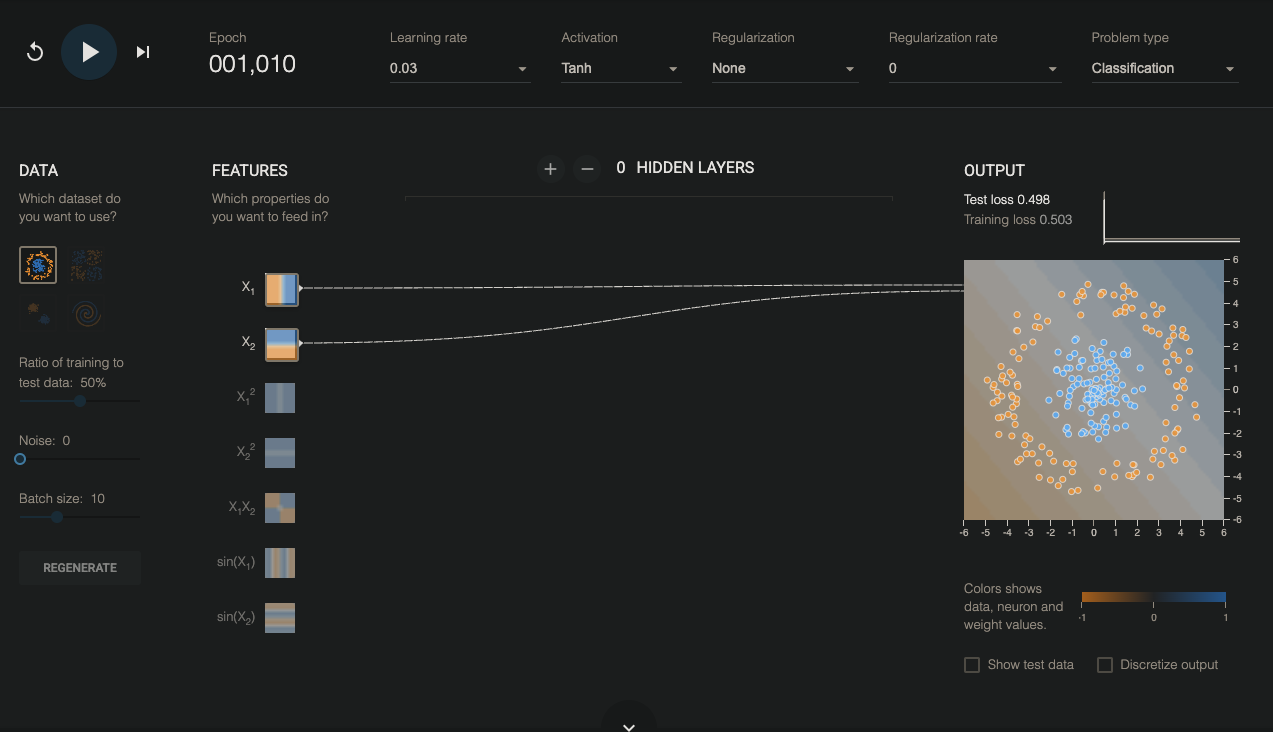

Como se puede observar en la imagen, si se eliminan las capas internas, el modelo no es capaz de separar los conjuntos de datos. Esto es un comportamiendo normal y esperado.

### b. Quin és el mínim nombre de capes internes que necessitau per separar els dos cercles?

- *1 Layer*

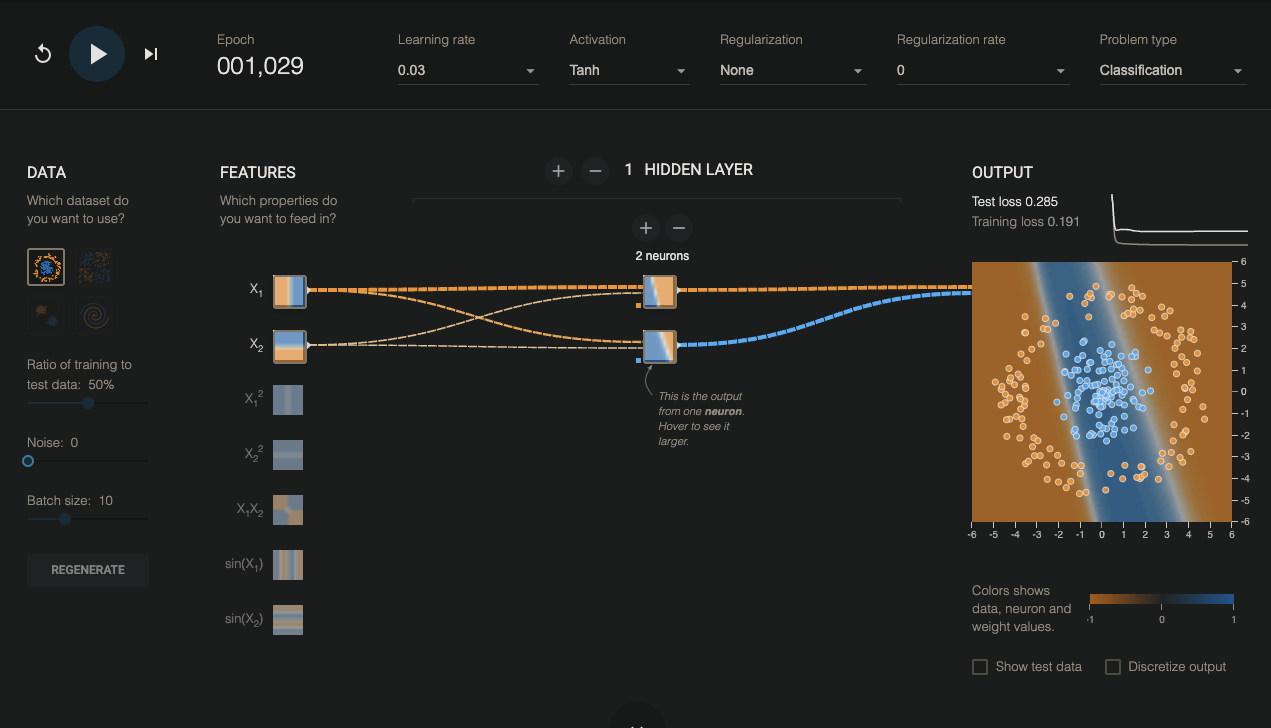

- *2 Layers*
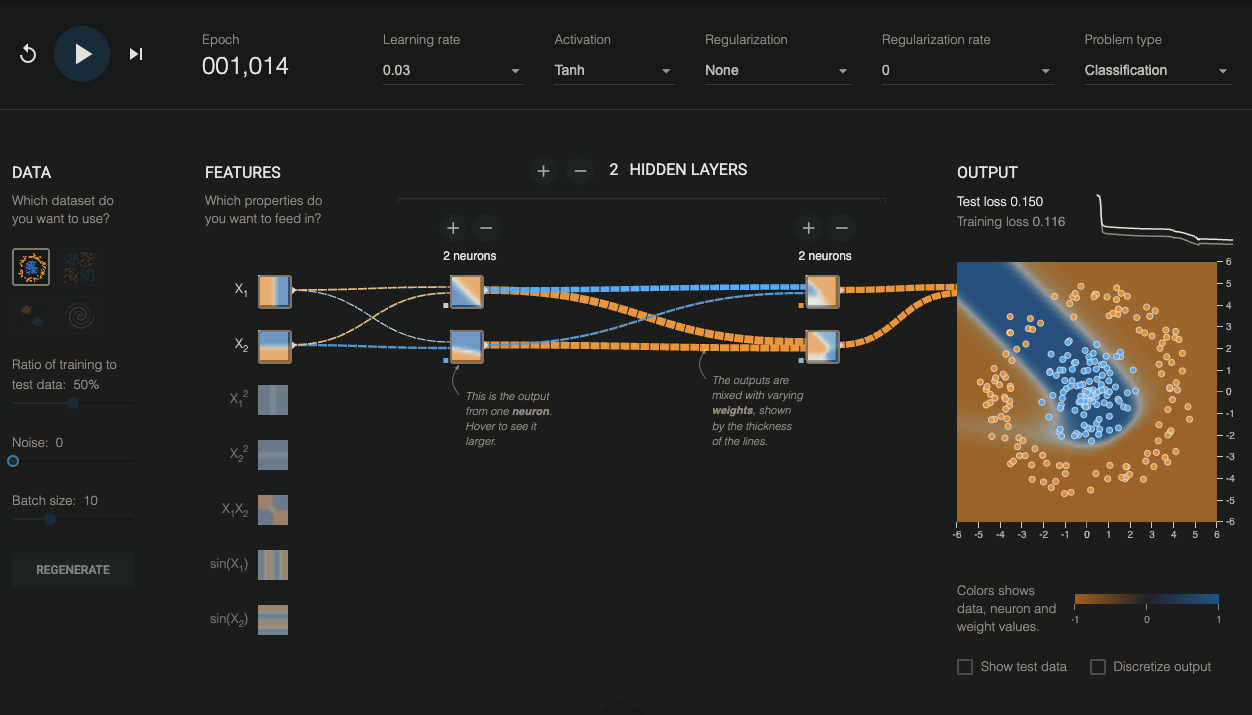

- *3 Layers*

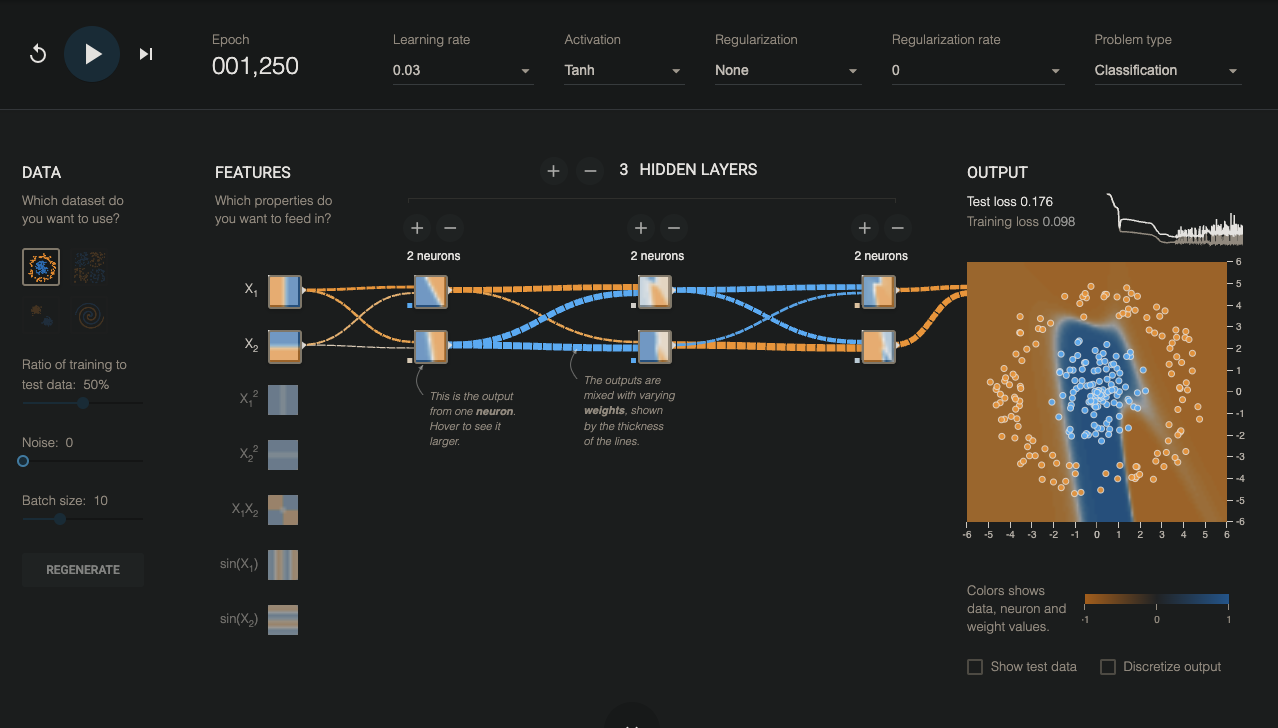

A medida que iba añadiendo capas con el algoritmo de tangente hiperbólica (y con el sigmoide igual), no se apreciaba diferencia. Siguiendo el recurso adjuntado, si aumento el número de neuronas por capa, incluso usando ReLu como función de activación se obtienen resultados muy satisfactorios.

- *ReLu*
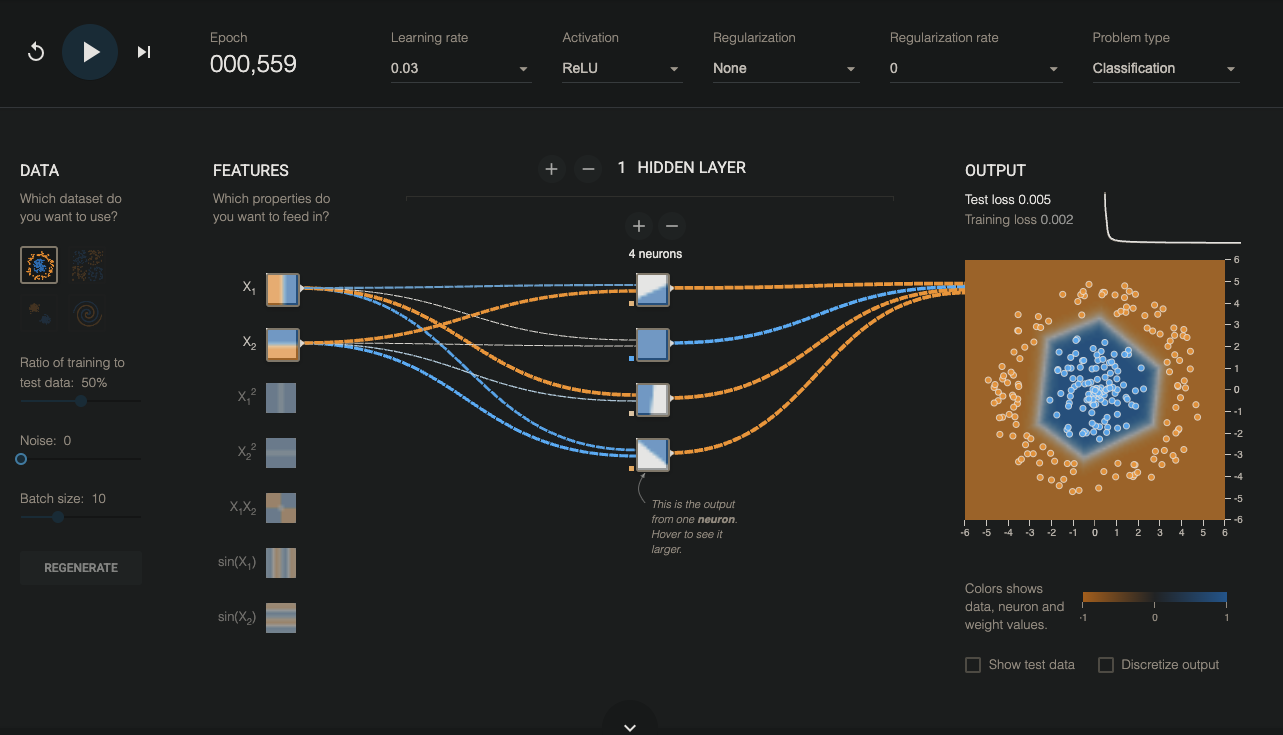

Al ser un algoritmo lineal, se puede ver que las formas que genera son rectas, lo cual es esperable. Aún así, con este modelo se obtienen resultados muy satisfactorios.

- Sigmoide y Tangente Hiperbólica:

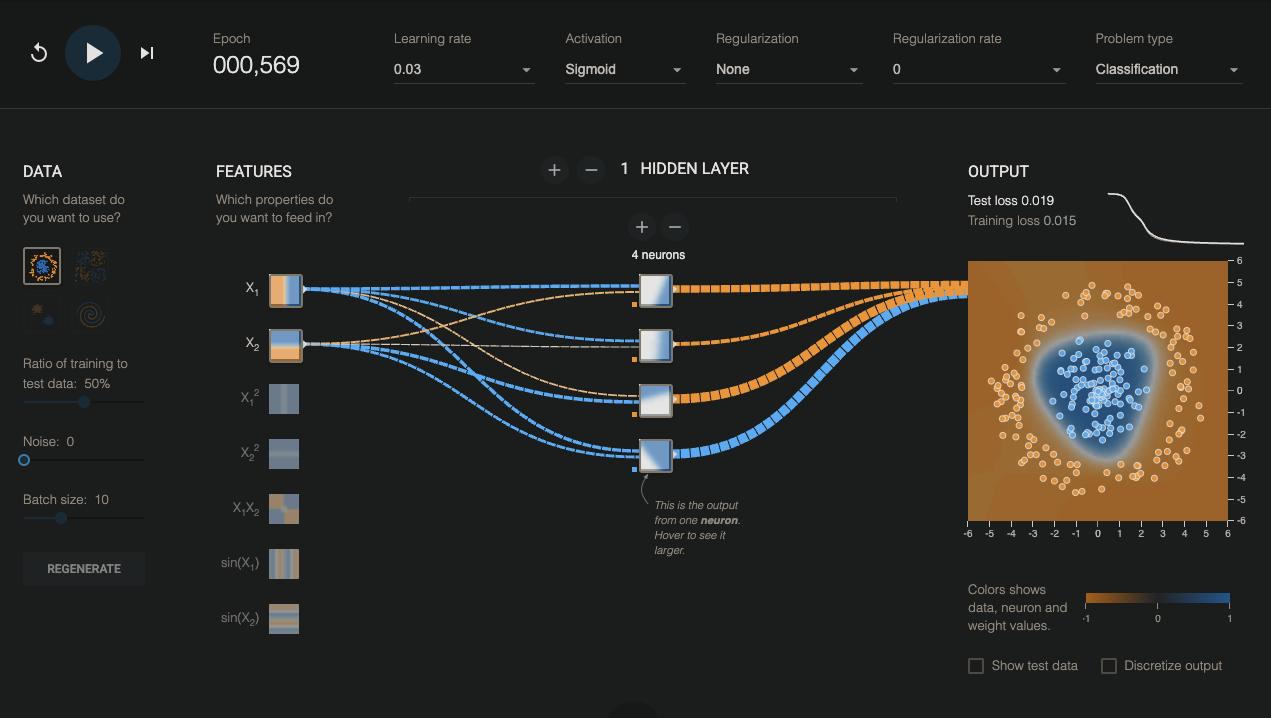

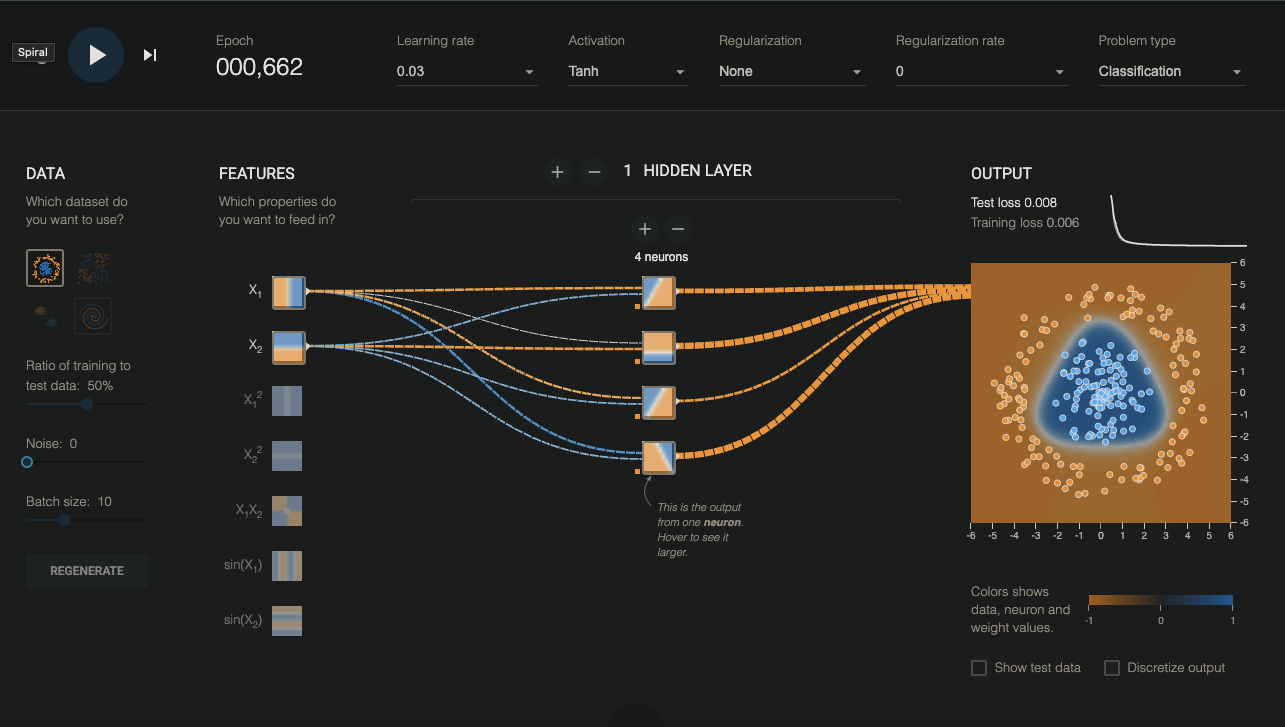

Estas funciones de activación, al no ser lineales, delimitan mediante formas no rectas, lo cual mejora la precisión en separar ambos conjuntos de datos.

Como conclusión final, y respondiendo explícitamente a la pregunta, se necesitarán únicamente una capa interna con 4 neuronas.

### c. En el conjunt de dades de dos clústers separables linealment, és necessària alguna capa interna per poder-los distingir?


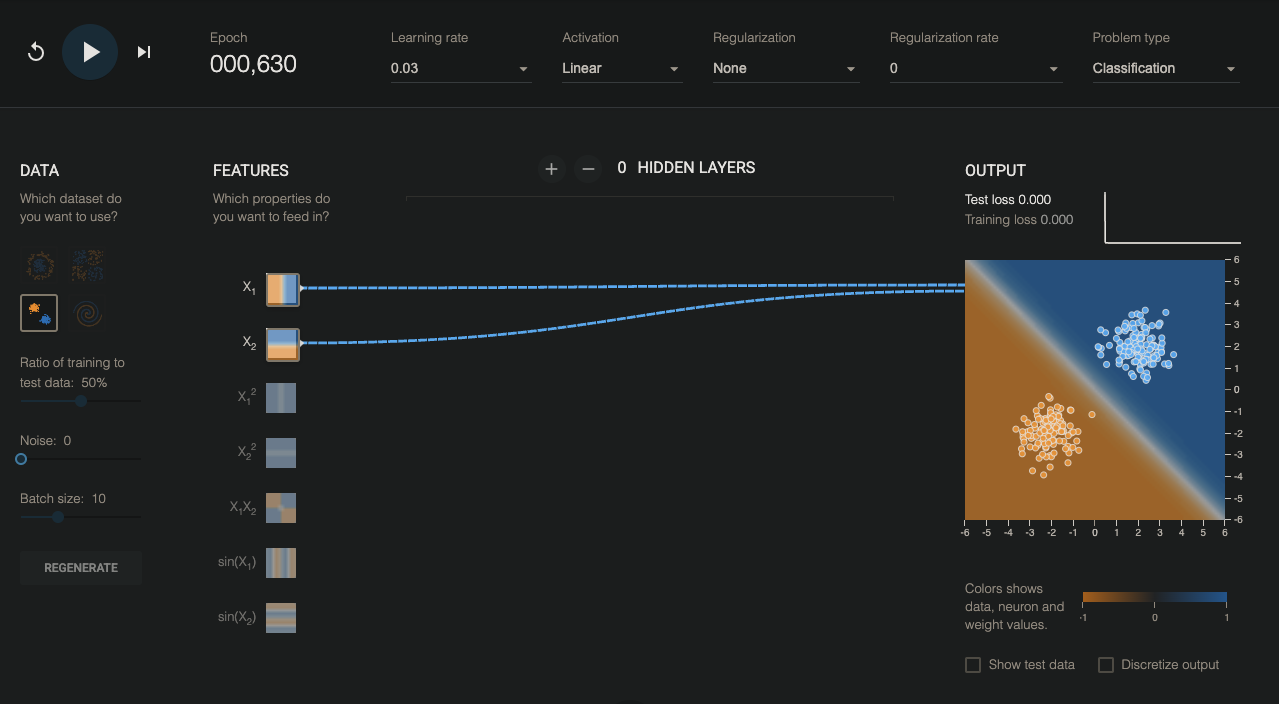

Como se puede ver en el resultado, no es necesario añadir ninguna capa interna cuando se usa el algoritmo lineal con este conjunto de datos.

### d. A les dades que correspon a la funció XOR, quina característica heu de triar per aconseguir separar les dades sense cap capa interna?

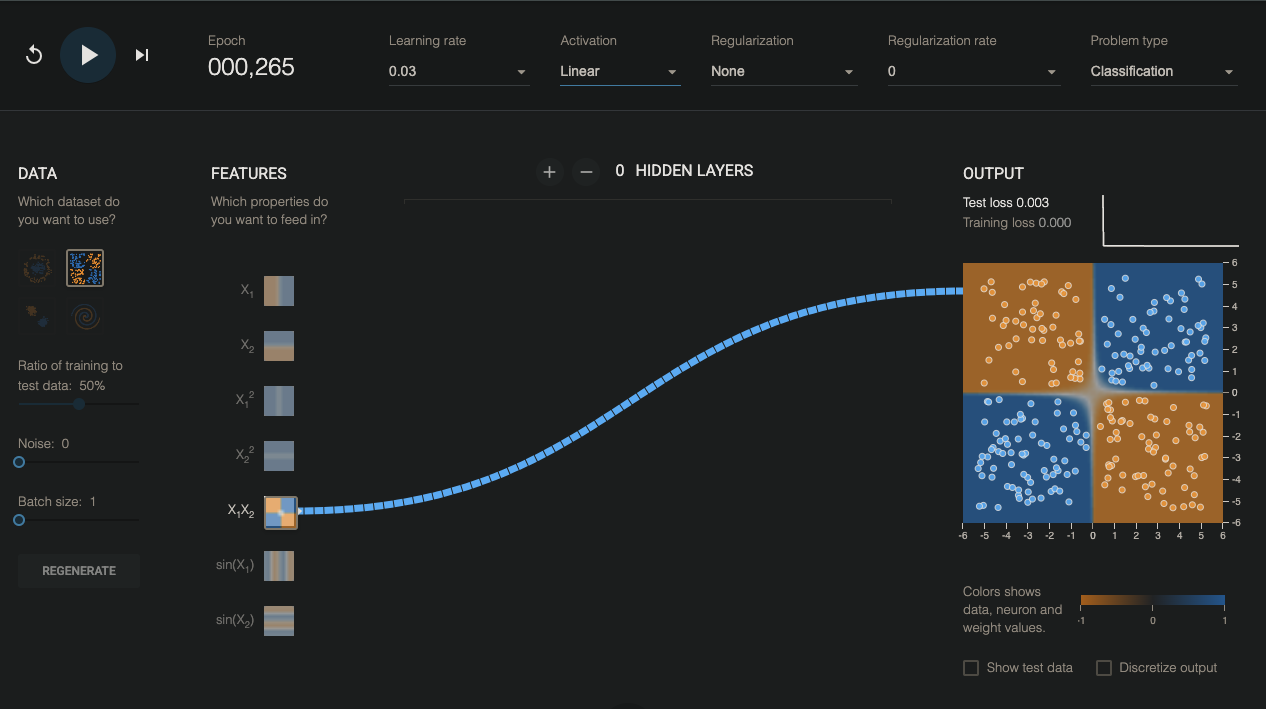

Como se puede ver en la imagen, para que el modelo separe bien el conjunto de datos en esta función sin necesidad de capas internas, el único ajuste que hay que realizar es el cambio de _feature_ a **x<sub>1</sub>x<sub>2</sub>**, indiferentemente de la función de activación.

# 1. Millora de l'aplicació MNIST

Als apunts, hem aconseguit una precisió del 80% a la base de dades MNIST.

En aquesta pregunta, treballarem quatre aspectes del procés: modificarem la funció d'activació, afegirem una capa interna, canviarem l'optimitzador i finalment compararem els resultats amb els obtinguts abans.

a. Afegiu una capa intermèdia amb 100 neurones.

b. Usau la funció d'activació 'relu'.

c. Obteniu la mida del model (nombre de paràmetres entrenables). Justificau aquest valor en funció del nombre de neurones de cada capa.

d. Entrenau el model usant l'optimitzador Adam en comptes de SGD.

e. Comparau la precisió obtinguda amb el model sense modificar dels apunts.

[Enlace al Notebook del código del apartado 6 de los apuntes](https://github.com/CharlyMech/IEDIB_CEIA_2024-25/blob/main/Sistemas%20de%20Aprendizaje%20automatico/Bloque%205/notes_code/section_6.ipynb)

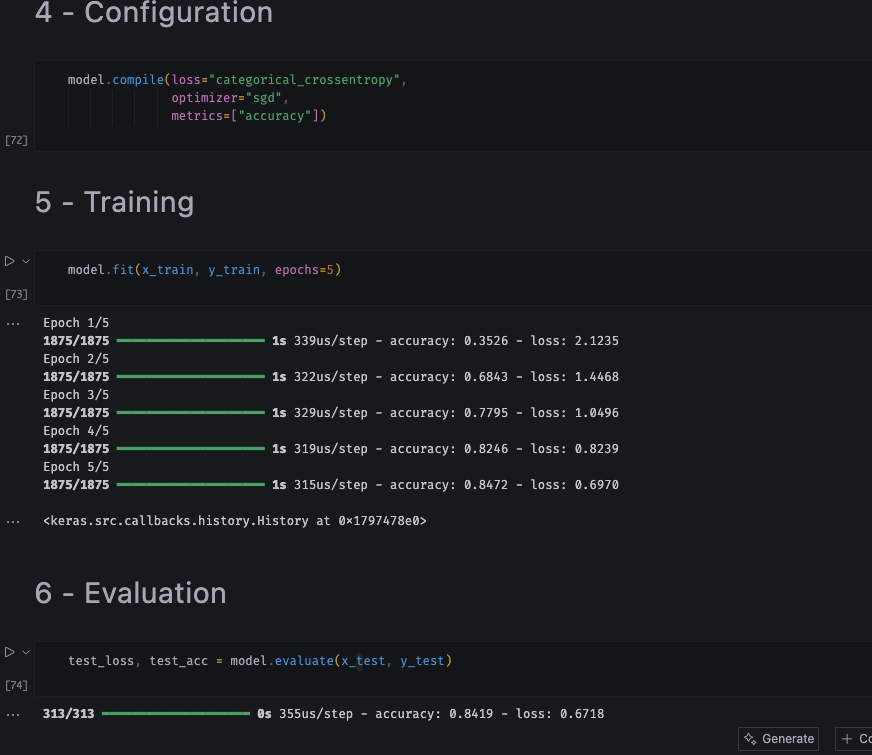

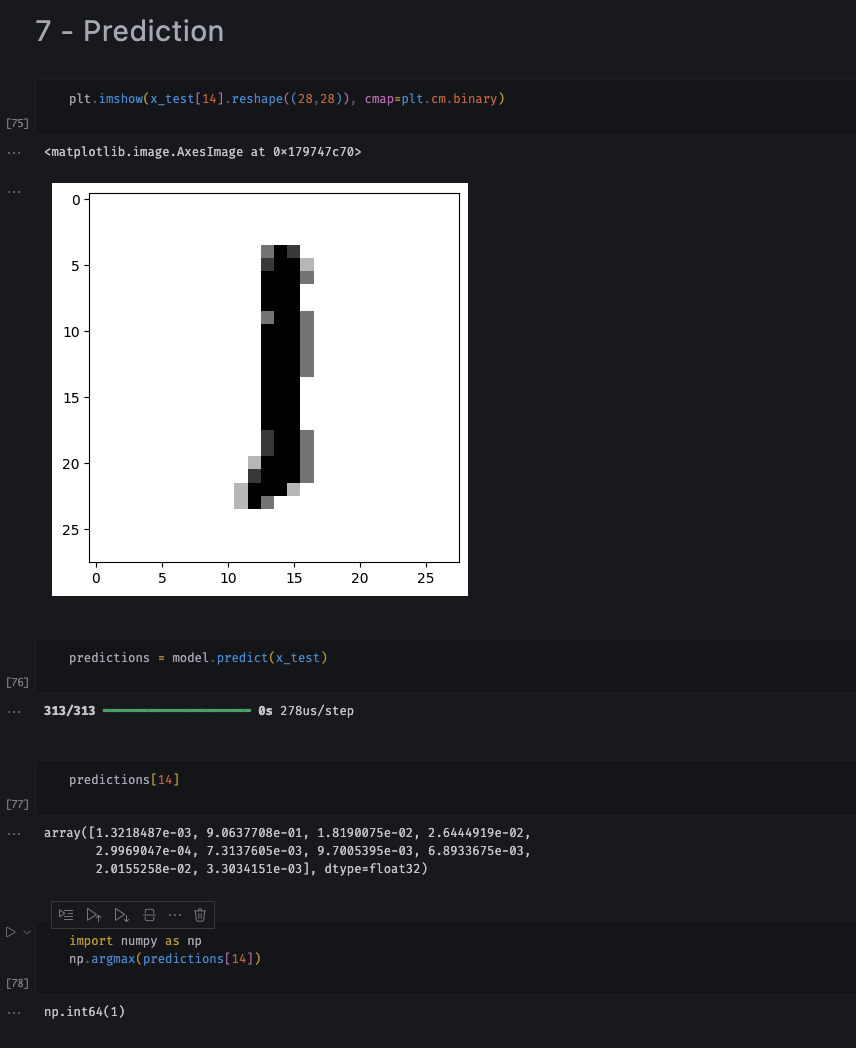

Como se puede ver en las capturas de pantalla anteriores (más sobre el ejercicio en el enlace al repositorio), el resultado obtenido es capaz de predecir con un 84% de precisión los números del dataset de Keras.

A continuación, repetiré el mismo proceso con las modificaciones especificadas para comparar los resultados obtenidos.

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


# 1. Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

# 2. Preprocess the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000,784)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 3. Model definition
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(tf.keras.layers.Dense(100, activation='relu')) # Add the extra hidden layer with 100 neurons
model.add(tf.keras.layers.Dense(10,activation='softmax')) 

In [6]:
# Model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,960 (38.91 KB)

 Trainable params: 9,960 (38.91 KB)

 Non-trainable params: 0 (0.00 B)

Para calcular el número total de parámetros entrenables en la red neuronal, se deben considerar tanto los pesos como los sesgos (bias) de cada capa.

1. Primera capa (Dense con 10 neuronas, activación 'sigmoid', entrada de 784 características):
	- Pesos: _784 * 10 = 7840_
	- Bias: _10_
	- Total: _7840 + 10 = 7850_

2. Segunda capa (Dense con 10 neuronas, activación 'softmax'):
	- Pesos: _10 * 10 = 100_
	- Bias: _10_
	- Total: _100 + 10 = 110_

3. Tercera capa (Dense con 100 neuronas, activación 'relu'):
	- Pesos: _10 * 100 = 1000_
	- Bias: _100_
	- Total: _1000 + 100 = 1100_

Sumando todos los parámetros entrenables:
_7850 + 110 + 1100 = 9060_

Por lo tanto, el número total de parámetros entrenables es **9060**.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.7294 - loss: 0.9362
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step - accuracy: 0.9162 - loss: 0.2872
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 370us/step - accuracy: 0.9273 - loss: 0.2457
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - accuracy: 0.9321 - loss: 0.2325
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - accuracy: 0.9352 - loss: 0.2142
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.9238 - loss: 0.2546
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step


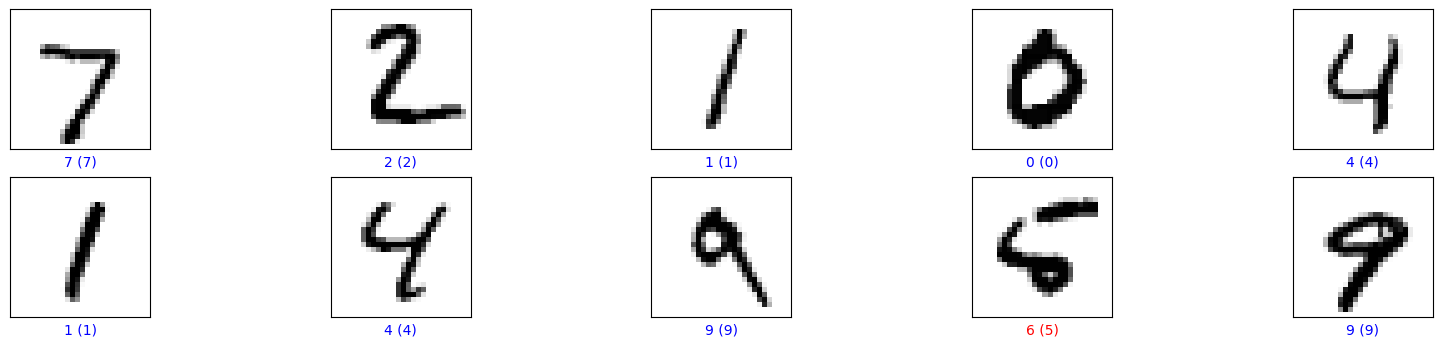

In [7]:
# 4. Configure the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])  

# 5. Training
model.fit(x_train, y_train, epochs=5)

# 6. Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)

# 7. Prediction
predictions = model.predict(x_test)

# Plot the first 10 test images, their predicted labels, and the true labels
num_rows, num_cols = 2, 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
	plt.subplot(num_rows, num_cols, i + 1)
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
	predicted_label = predictions[i].argmax()
	true_label = y_test[i].argmax()
	color = 'blue' if predicted_label == true_label else 'red'
	plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()

Podemos ver que para esta ejecución, las imágenes todas coinciden su predicción con etiqueta o label. En cuanto a la precisión del modelo, se puede ver en los prints que se obtiene un 93% de eficacia, siendo casi un 10% más que en el ejemplo del apartado 6 de los apuntes. Esto supone un aumento significativo en la precisión de predicción del modelo, resultado en una mejor aproximación.

# 2. Replicació d'un experiment

Stephen Wolfram publicà un [article llarg](https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/) en què explica molts de conceptes d'aprenentatge automàtic. El podeu llegir complet; hi trobareu conceptes que ja coneixeu i d'altres que encara no.

En aquest exercici treballarem la xarxa neuronal que proposa per mirar de replicar l'experiment descrit i comprovar si obtenim resultats semblants.

Aproximarem la següent funció.
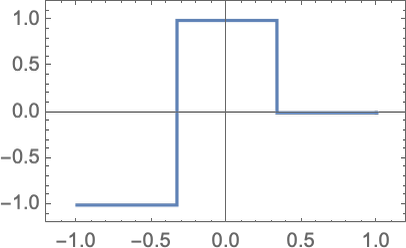


I utilitzarem aquesta arquitectura.

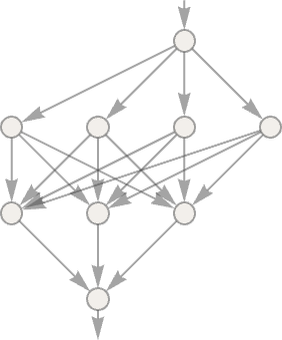

a. Calculau quants de paràmetres té la xarxa obtinguda, detallant quants de pesos i quants de biaixos hi ha en cada capa i en total. Teniu en compte que cada neurona té tants de pesos com fletxes hi entren i un biaix addicional.

b. Definiu la xarxa neuronal de la imatge usant Keras. Utilitzau la funció d'activació ReLU a les capes internes i la funció d'activació lineal a la darrera capa d'una sola neurona, ja que es tracta d'una aplicació de **regressió**.

c. Obteniu el resum de la vostra xarxa amb el mètode corresponent i comprovau que coincideix amb el que heu calculat a l'apartat a.

d. Generau un conjunt de dades adequat per entrenar la xarxa i obtenir una bona aproximació a la funció desitjada. Considerau un rang de valors d'$x$ entre $-5$ i $5$ i valors d'$y$ d'acord amb la funció de tres regions constants indicada. En aquest cas, els valors d'$x$ tant poden ser aleatoris com distribuïts equitativament, no ha de canviar gaire el resultat.

e. Mostrau la funció aproximada per la vostra xarxa per a diferents mides del conjunt d'entrenament. Podeu prendre com a orientació els valors donats a l'article (10000, 100000, 1000000 i 10000000). Coincideixen les vostres aproximacions amb les mostrades a l'article?

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - loss: 0.6453
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.1755
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 0.1491
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.1291
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 0.1211
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step


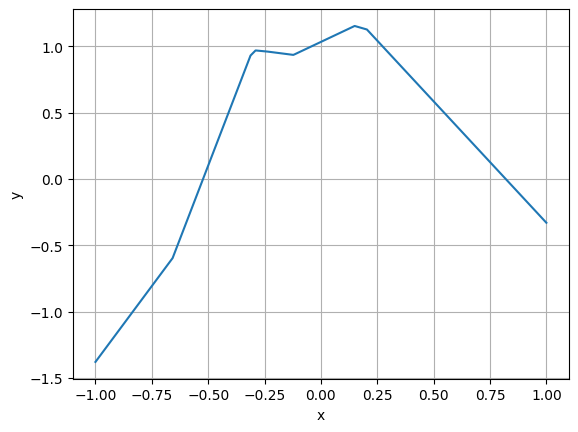

Epoch 1/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 309us/step - loss: 0.1957
Epoch 2/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 310us/step - loss: 0.0206
Epoch 3/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 308us/step - loss: 0.0099
Epoch 4/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 307us/step - loss: 0.0067
Epoch 5/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 307us/step - loss: 0.0059
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 193us/step


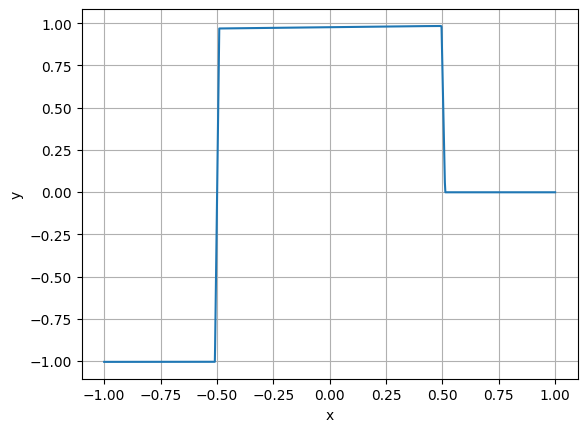

Epoch 1/5
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 31s 306us/step - loss: 0.0557
Epoch 2/5
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 31s 305us/step - loss: 0.0053
Epoch 3/5
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 30s 301us/step - loss: 0.0049
Epoch 4/5
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 30s 297us/step - loss: 0.0049
Epoch 5/5
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 30s 299us/step - loss: 0.0043
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 6s 194us/step


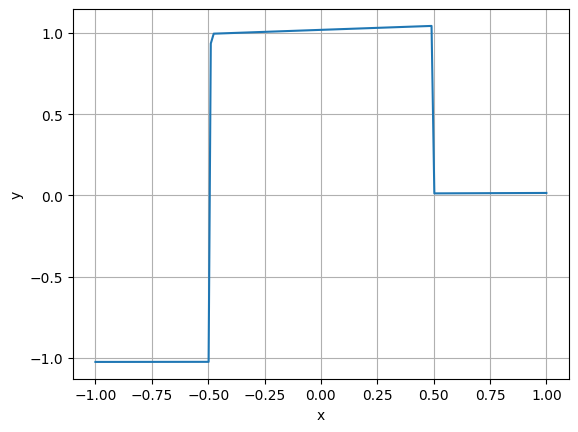

Epoch 1/5
1000000/1000000 ━━━━━━━━━━━━━━━━━━━━ 306s 306us/step - loss: 0.0107
Epoch 2/5
1000000/1000000 ━━━━━━━━━━━━━━━━━━━━ 310s 310us/step - loss: 0.0038
Epoch 3/5
1000000/1000000 ━━━━━━━━━━━━━━━━━━━━ 326s 326us/step - loss: 0.0033
Epoch 4/5
1000000/1000000 ━━━━━━━━━━━━━━━━━━━━ 331s 331us/step - loss: 0.0030
Epoch 5/5
1000000/1000000 ━━━━━━━━━━━━━━━━━━━━ 326s 326us/step - loss: 0.0028
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 60s 192us/step


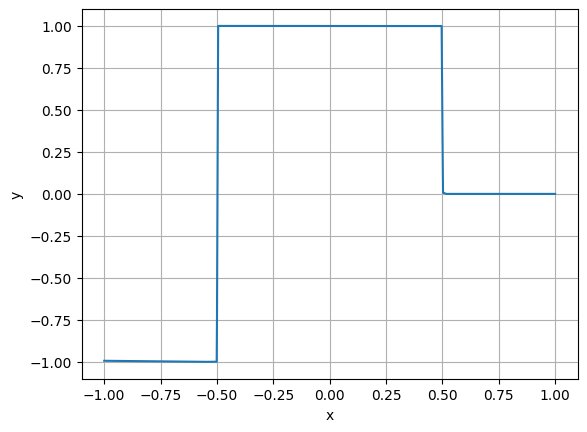

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

def target_function(x):
    return np.where(x < -0.5, -1, np.where(x > 0.5, 0, 1))

def generate_model(n: int = 1000, epochs: int = 5, batch_size: int = 10) -> keras.Model:
	np.random.seed(42)
	x = np.random.uniform(-1, 1, size=(n, 1))
	y = target_function(x)
	model = keras.Sequential([
		layers.Dense(4, activation='relu', input_shape=(1,)),
		layers.Dense(3, activation='relu'),
		layers.Dense(1, activation='linear') 
	])
	model.compile(optimizer='adam', loss='mse')
	model.fit(x, y, epochs=epochs, batch_size=batch_size, verbose=1)
	return model

def plot_model_prediction(model: keras.Model, n: int = 1000) -> None:
	x_test = np.linspace(-1, 1, n).reshape(-1, 1)
	y_pred = model.predict(x_test)
	plt.plot(x_test, y_pred, label='Neural Network approach')
	plt.xlabel('x')
	plt.ylabel('y')
	plt.grid()
	plt.show()


model_10K = generate_model(n=10000, ) # epochs=10, batch_size=32
# model_10K.summary()
plot_model_prediction(model_10K, n=10000)

model_100K = generate_model(n=100000, ) # epochs=10, batch_size=32
# model_100K.summary()
plot_model_prediction(model_100K, n=100000)

model_1M = generate_model(n=1000000, ) # epochs=10, batch_size=32
# model_1M.summary()
plot_model_prediction(model_1M, n=1000000) 

model_10M = generate_model(n=10000000, ) # epochs=10, batch_size=32
# model_10M.summary()
plot_model_prediction(model_10M, n=10000000)